<a href="https://colab.research.google.com/github/alexandreuch/AVD/blob/main/ATV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

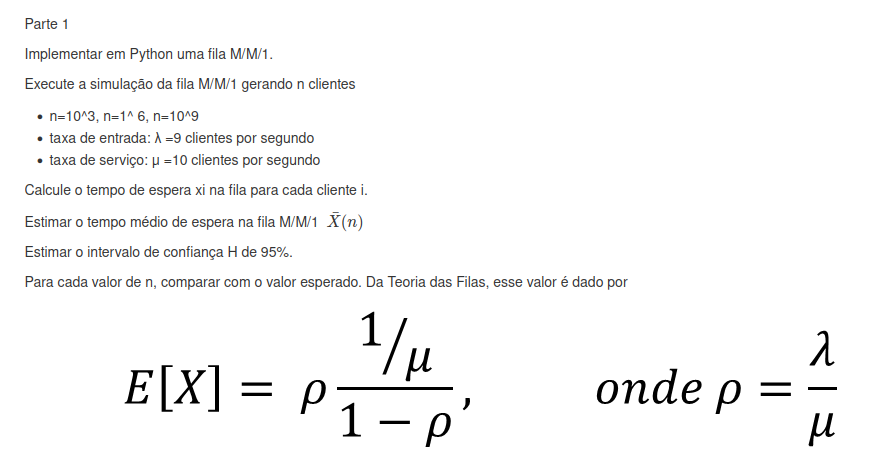

In [ ]:
import numpy as np
import random
#https://simpy.livrosimulacao.eng.br/parte-i-introducao/criando-_ocupando_e_desocupando_recursos/exemplo_fila_mm1

In [ ]:
def G5(n):
    random.seed(1030)

    vet_rn = []
    for i in range(0,n+1,1):
        vet_rn.append(random.random())
    
    return(np.array(vet_rn)) 

In [ ]:
def random_list(vet,B):
    Ts = np.zeros(len(vet))
    for i in range(0,len(vet)):
        Ts[i] = -B*np.log(1-vet[i])
    return Ts

In [ ]:
class MM1():
    def __init__(self, tx_service, tx_entry):
        self.DEBUG = 1
        self.total_clients_attended = 0
        self.clock = 0.0
        
        self.mean_wait = 0.0

        self.tx_service = tx_service
        self.tx_entry = tx_entry

    def process_queue(self):
        if( self.DEBUG == 1):
            print("Taxa Serviço: ",self.tx_service,"\n")
            print("Taxa Entrada: ",self.tx_entry,"\n")
        
        for i in range(0,len(self.tx_service)):
            if(self.DEBUG == 1):
                print(i, " - Clock: ", self.clock)

            client_entry = self.tx_entry[i] 
            client_service = self.tx_service[i]

            bff = self.clock - client_entry 
            print(bff)
            if(bff >= 0): self.clock += client_service 
            else: self.clock = bff + client_service
            

In [ ]:
N=10
random_arr = G5(N)

B=1/10
tx_service = random_list(random_arr,B)

B=1/9
tx_entry = random_list(random_arr,B)
tx_entry[0] = 0

a = MM1(tx_service,tx_entry)

In [ ]:
a.process_queue()

Taxa Serviço:  [0.31673776 0.05547079 0.09108649 0.10647882 0.02090357 0.29753426
 0.28420827 0.07149532 0.19901405 0.14014353 0.05956069] 

Taxa Entrada:  [0.         0.06163421 0.10120721 0.1183098  0.02322619 0.33059362
 0.31578697 0.07943925 0.22112672 0.15571503 0.06617855] 

0  - Clock:  0.0
0.0
1  - Clock:  0.31673776088594335
0.25510355530438056
2  - Clock:  0.3722085459093499
0.2710013344206115
3  - Clock:  0.4632950362492144
0.3449852386306759
4  - Clock:  0.5697738541058992
0.5465476599225115
5  - Clock:  0.5906774288709481
0.2600838041710358
6  - Clock:  0.8882116911008692
0.5724247248240343
7  - Clock:  1.1724199607500205
1.092980713560677
8  - Clock:  1.2439152832204297
1.0227885594203001
9  - Clock:  1.4429293346405463
1.287214300392496
10  - Clock:  1.5830728654637916
1.5168943191549038
